In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt  

In [2]:
df = pd.read_excel("/Users/ayemaq/desktop/TEMPLATE_DA_Mod1Project/data/cleaned/cafe_data_FINAL.xlsx")

Figuring out what are the top 3 items that bring hte highest rev

first lets see how many missing data we are missing from grand total and items



In [3]:
bad_values = df[['Grand total', 'Items']].apply(
    lambda row: any([
        pd.isna(row['Grand total']) or str(row['Grand total']).strip().lower() == "no value" or str(row['Grand total']).strip() == "" or row['Grand total'] == 0,
        pd.isna(row['Items']) or str(row['Items']).strip().lower() == "no value" or str(row['Items']).strip() == "" or row['Items'] == 0
    ]),
    axis=1
)


bad_total_count = bad_values.sum()
print("Number of bad values in 'Grand total' and 'Items':", bad_total_count)

Number of bad values in 'Grand total' and 'Items': 26


To figure out what the highest rev is, first find the grand total for each item, then compare which is highest

In [4]:
cols_to_check = ['Items', 'Quantity', 'Price Per Unit', 'Grand total']

# Define what counts as a "bad" value
def is_bad(val):
    return (
        pd.isna(val) or
        str(val).strip().lower() == "no value" or
        str(val).strip() == "" or
        val == 0
    )

# Filter: keep only rows where all important columns are clean
df_cleaned = df[~df[cols_to_check].apply(lambda row: row.apply(is_bad)).any(axis=1)]


In [5]:
item_revenue = df_cleaned.groupby('Items')['Grand total'].sum()
top_items = item_revenue.sort_values(ascending=False)
# print out
print(top_items.head(8))



Items
Salad        19065
Sandwich     13644
Smoothie     13296
Juice        10509
Cake         10377
Coffee        7794
Tea         5443.5
ITEM          5087
Name: Grand total, dtype: object


horizontal bar chart for visulization below 

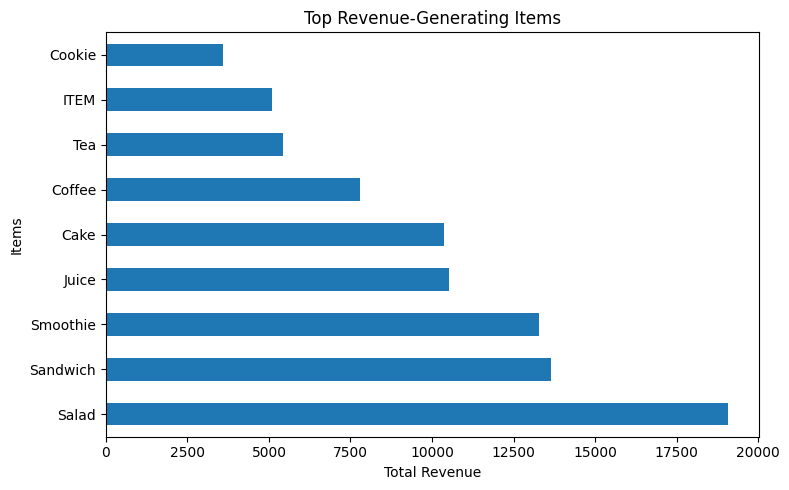

In [6]:
top_items.plot(kind='barh', figsize=(8, 5), title='Top Revenue-Generating Items')
plt.xlabel('Total Revenue')
plt.ylabel('Items')
plt.tight_layout()
plt.show()


The bar chart above illustrates the total revenue generated by each item from highest to lowest for the year 2023.
As shown, salad was the top-performing item, bringing in the most revenue, while cookies generated the least.

This suggests an opportunity for improvement. Rather than removing underperforming items like cookies, the café could consider promotional strategies or bundling. For example:

Pairing cookies with tea as a value deal.

Offering a combo of sandwiches and a beverage, which reflects natural buying behavior.

Bundled offerings not only encourage additional purchases but also enhance the overall customer experience—something worth proposing to the café owner.




### 📊 Histogram of Daily Transactions
- A histogram is a special kind of bar chart that shows how often certain ranges of values appear in a dataset. In our case, we used a histogram to understand how busy the café is on a day-to-day basis.

### 🔍 What this histogram shows:
- We plotted the number of transactions per day (x-axis) against the number of days that had that level of activity (y-axis). Each bar groups together a range of daily transactions — for example, one bar might represent all the days where the café had 25 to 27 transactions.

### ✅ How it works:
- X-axis: "Number of Transactions per Day" → This shows different transaction ranges (e.g., 15–17, 18–20, etc.).
- Y-axis: "Number of Days" → This tells us how many days had transaction counts that fall within each of those ranges.

For example:
- If one bar at x=25–27 has a height of 55, that means 55 different days had between 25 and 27 transactions.

### 🧠 What insights this gives us:
- What is a typical transaction count per day? (The tallest bar shows the most common range.)
- How consistent is business? (If the histogram is narrow, customer volume is steady; if wide, it's more unpredictable.)
- Are there any outliers or rare cases (very quiet or extremely busy days)?
- Helps us spot customer traffic patterns without having to manually read dates or totals.

### 📌 What questions this helps answer:
1. What’s the average level of daily traffic?
2. Are there any unusual peaks or dips in customer activity?
3. How predictable is our daily business?
4. Can we identify busy vs. slow periods overall — regardless of weekday or weekend?



In [7]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])


In [8]:
daily_days = df['Transaction Date'].value_counts().sort_index()


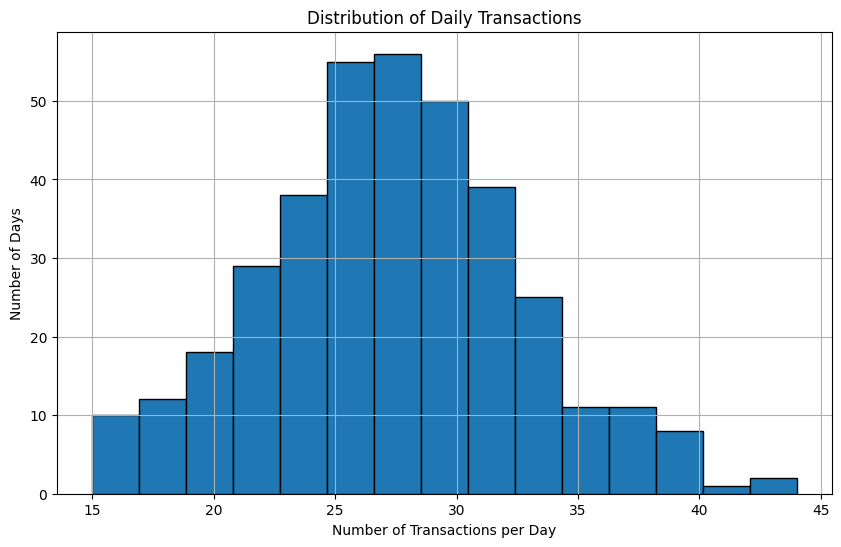

In [9]:

plt.figure(figsize=(10, 6))
plt.hist(daily_days, bins=15, edgecolor='black')
plt.title('Distribution of Daily Transactions')
plt.xlabel('Number of Transactions per Day')
plt.ylabel('Number of Days')
plt.grid(True)
plt.show()


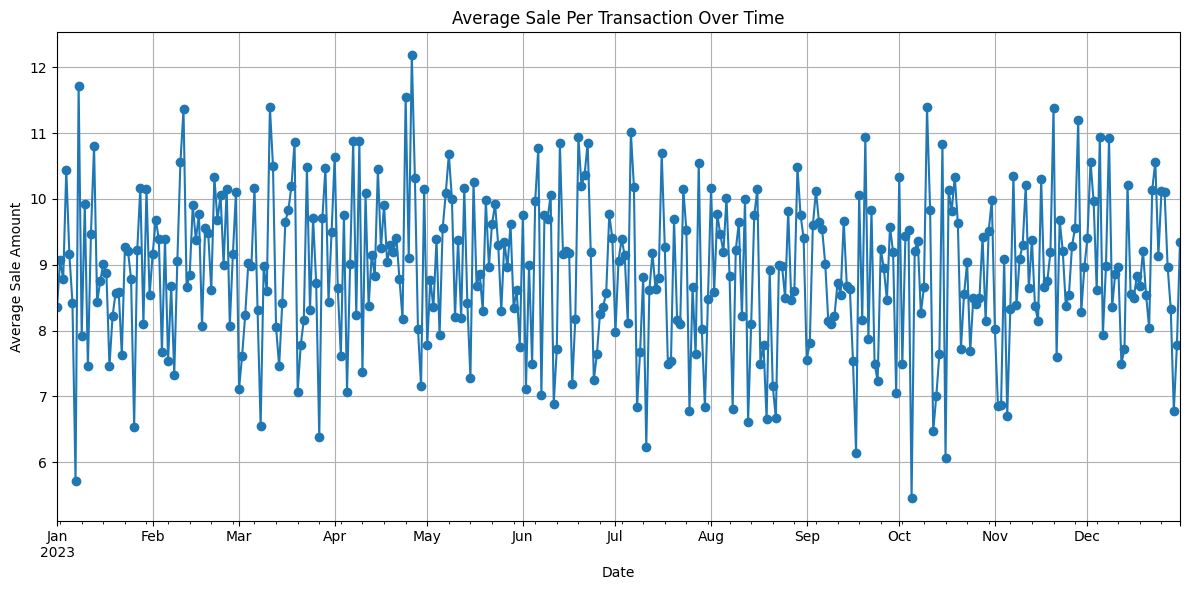

In [10]:
# Remove strings like 'No Value' or empty cells and convert to NaN
df['Grand total'] = pd.to_numeric(df['Grand total'], errors='coerce')

df = df.dropna(subset=['Grand total'])


# Make sure Transaction Date is in datetime format
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

# Group by date and calculate average sale per transaction
avg_sales = df.groupby('Transaction Date')['Grand total'].mean()

# Plot it
plt.figure(figsize=(12, 6))
avg_sales.plot(kind='line', marker='o')
plt.title('Average Sale Per Transaction Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sale Amount')
plt.grid(True)
plt.tight_layout()
plt.show()


We created a line chart to track average sale per transaction by month. This allowed us to see whether people were spending more or less over time. We noticed that spending peaked in April, dipped during late summer, and rose again at the end of the year. These patterns suggest seasonal behaviors that the café could take advantage of for promotions or menu changes.

This chart displays the average sale amount per transaction for each month in 2023. By calculating the average of all individual transaction totals per month, it gives us a clearer picture of how much customers were spending each time they made a purchase. The x-axis shows each month from January to December, while the y-axis represents the average dollar amount spent. From this chart, we can observe that spending peaked around April, with the highest average sale amount, and dropped during the summer months, especially in September, which had the lowest spending per transaction. Toward the end of the year, spending gradually increased again, likely due to the holiday season. This trend helps us understand customer purchasing behavior over time and may guide decisions on when to run promotions or adjust pricing based on seasonal shifts in spending.



In [11]:
# Make sure your 'Days_of_week' column is clean and contains values 1–7
# Map numbers to actual day names (optional but useful)
day_names = {
    1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday',
    5: 'Thursday', 6: 'Friday', 7: 'Saturday'
}

# Replace day numbers with names (only if needed)
df['Day_Name'] = df['Days_of_week'].map(day_names)

# Count the number of transactions per day
day_transaction_counts = df['Day_Name'].value_counts().sort_index()

# Print the results
print("Number of transactions per day of the week:")
print(day_transaction_counts, day_transaction_counts.max())


Number of transactions per day of the week:
Day_Name
Friday       1442
Monday       1437
Saturday     1415
Sunday       1440
Thursday     1434
Tuesday      1376
Wednesday    1414
Name: count, dtype: int64 1442


The busiest day of the week based on transcations has been Friday


In [12]:
# what day is most profitable: thursday
revenue_by_day = df.groupby('Day_Name')['Grand total'].sum().sort_values(ascending=False)
print(revenue_by_day, revenue_by_day.max())

Day_Name
Thursday     12960.0
Sunday       12865.0
Friday       12854.0
Tuesday      12676.0
Monday       12666.0
Saturday     12451.5
Wednesday    12364.0
Name: Grand total, dtype: float64 12960.0


In [13]:
# what month s basiest

busiest_month = df['Transaction Date'].dt.to_period('M').value_counts().sort_index()
print(busiest_month, busiest_month.max())


Transaction Date
2023-01    874
2023-02    755
2023-03    869
2023-04    817
2023-05    803
2023-06    865
2023-07    817
2023-08    828
2023-09    815
2023-10    870
2023-11    821
2023-12    824
Freq: M, Name: count, dtype: int64 874


In [14]:
# Ensure 'Transaction Date' is in datetime format
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

# --- Most Profitable Month ---
# Extract month names
df['Month_Name'] = df['Transaction Date'].dt.strftime('%B')

# Group by month and sum revenue
monthly_revenue = df.groupby('Month_Name')['Grand total'].sum()

# Sort and find the most profitable month
most_profitable_month = monthly_revenue.sort_values(ascending=False)
print("Total Revenue by Month:\n", most_profitable_month)
print("\nMost Profitable Month:", most_profitable_month.idxmax())


Total Revenue by Month:
 Month_Name
June         7772.5
January      7724.5
October      7666.0
March        7650.5
April        7589.0
December     7488.0
November     7319.5
August       7271.5
May          7220.5
July         7127.0
September    7042.5
February     6965.0
Name: Grand total, dtype: float64

Most Profitable Month: June


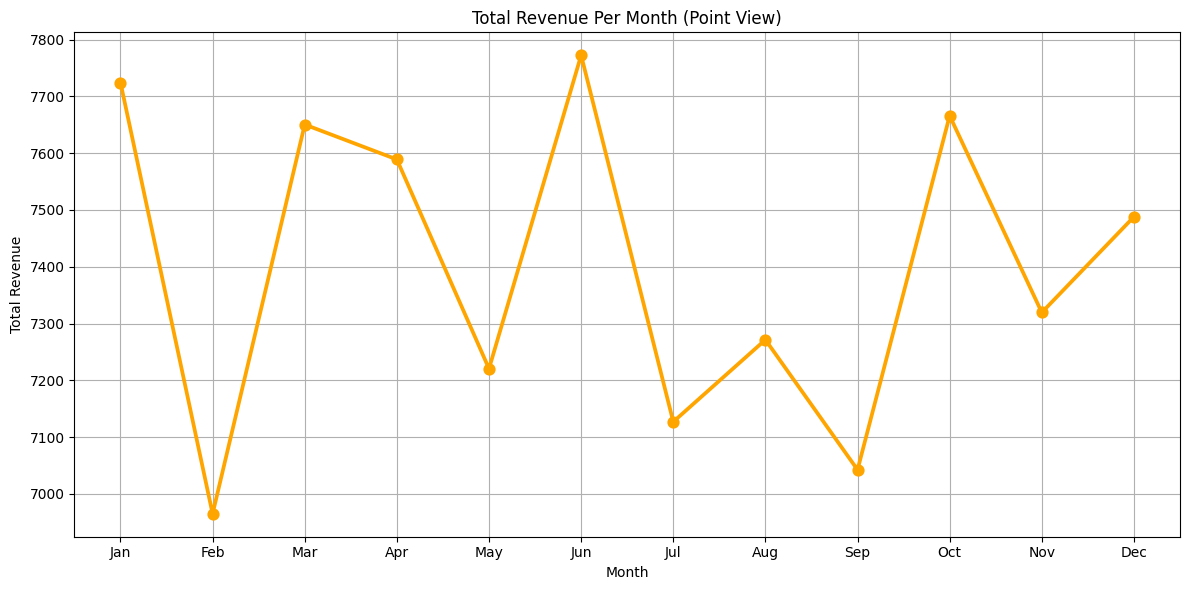

In [15]:
# Convert to datetime if not already
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

# Create a new column with month names
df['Month_Name'] = df['Transaction Date'].dt.strftime('%b')  # 'Jan', 'Feb', etc.

# Group by month name (optional: include ordering to keep Jan-Dec)
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

monthly_revenue = df.groupby('Month_Name', sort=False)['Grand total'].sum().reindex(month_order)

# Reset index for Seaborn plot
monthly_revenue = monthly_revenue.reset_index()
monthly_revenue.columns = ['Month', 'Grand total']
plt.figure(figsize=(12, 6))
sns.pointplot(data=monthly_revenue, x='Month', y='Grand total', color='orange')
plt.title('Total Revenue Per Month (Point View)')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()



Total Revenue by Month:
 Month_Name
Jun    7772.5
Jan    7724.5
Oct    7666.0
Mar    7650.5
Apr    7589.0
Dec    7488.0
Nov    7319.5
Aug    7271.5
May    7220.5
Jul    7127.0
Sep    7042.5
Feb    6965.0
Name: Grand total, dtype: float64
Most profitable month: Jun


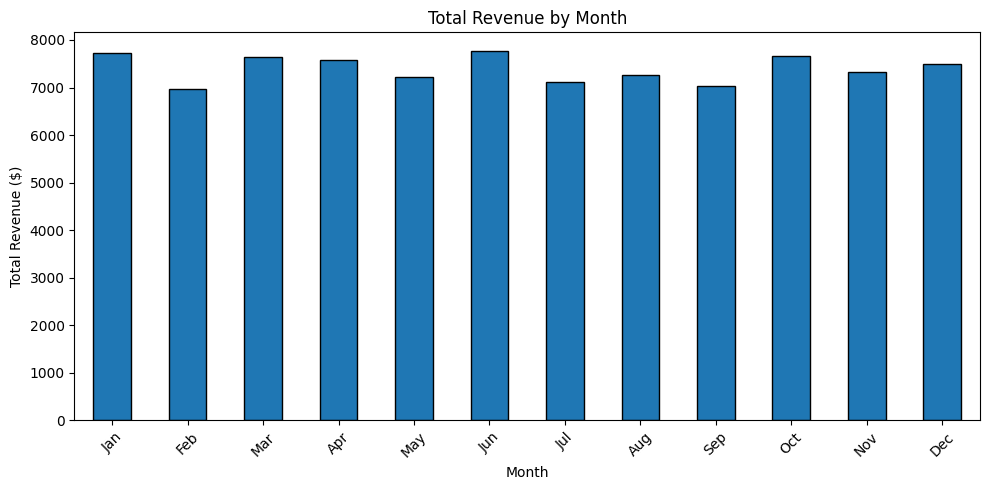

In [16]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
df['Grand total'] = pd.to_numeric(df['Grand total'], errors='coerce')
# (Assume we’ve already dropped or imputed NaNs in 'Grand total'.)

# 2. Aggregate total revenue by month name
df['Month'] = df['Transaction Date'].dt.month
# Optionally map to names:
month_map = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df['Month_Name'] = df['Month'].map(month_map)

monthly_rev = df.groupby('Month_Name')['Grand total'].sum().reindex(
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
)
print("Total Revenue by Month:\n", monthly_rev.sort_values(ascending=False))
print("Most profitable month:", monthly_rev.idxmax())

# 3. Plot for stakeholder
plt.figure(figsize=(10,5))
monthly_rev.plot(kind='bar', edgecolor='black')
plt.title("Total Revenue by Month")
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


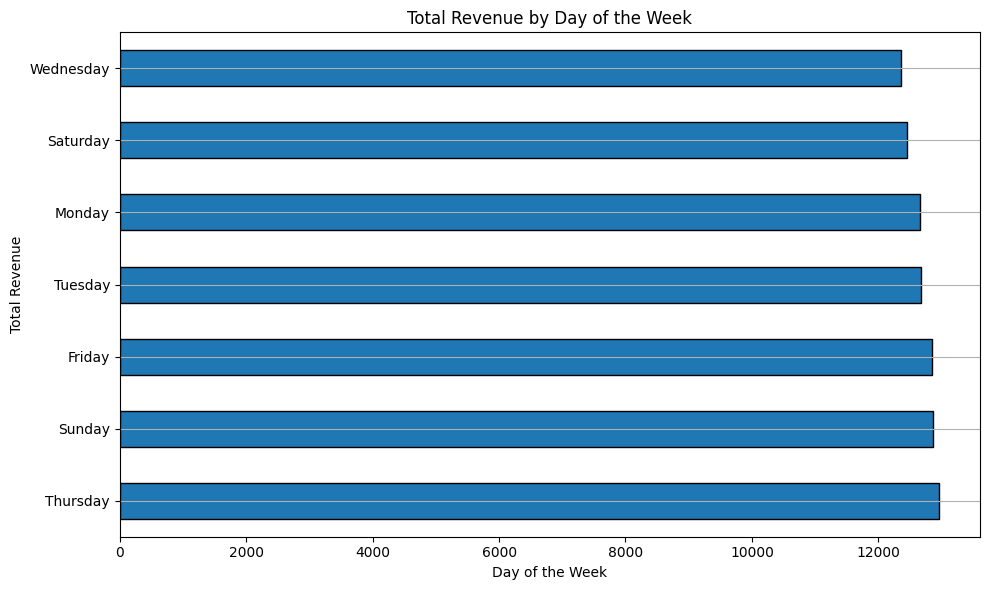

In [19]:
# Assuming your DataFrame is already loaded and cleaned as `df`
# Group by day name and sum the total revenue
revenue_by_day = df.groupby('Day_Name')['Grand total'].sum().sort_values(ascending=False)

# Plot the most profitable days
plt.figure(figsize=(10, 6))
revenue_by_day.plot(kind='barh', edgecolor='black')
plt.title('Total Revenue by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Revenue')
plt.grid(axis='y')
plt.tight_layout()
plt.show()